In [1]:
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')

In [2]:
import dcd as util

In [4]:
import ee
ee.Authenticate() 
ee.Initialize()


Successfully saved authorization token.


In [38]:
import geopandas as gpd
dataframe = gpd.read_file('/data2/hkaman/Data/CDL/California_Counties.geojson')
dataframe = dataframe.to_crs(epsg=4326)
dataframe

,OBJECTID,NAME,STATE_NAME,STATE_FIPS,CNTY_FIPS,FIPS,Shape__Area,Shape__Length,geometry
0,1,Alameda County,California,06,001,06001,3.084661e+09,4.484258e+05,"MULTIPOLYGON (((-122.19112 37.69298, -122.1910..."
1,2,Alpine County,California,06,003,06003,3.156006e+09,2.755651e+05,"POLYGON ((-119.90061 38.93077, -119.88726 38.9..."
2,3,Amador County,California,06,005,06005,2.562531e+09,3.595932e+05,"POLYGON ((-120.07765 38.70889, -120.07771 38.7..."
3,4,Butte County,California,06,007,06007,7.340033e+09,5.259746e+05,"POLYGON ((-121.40463 40.14665, -121.40489 40.1..."
4,5,Calaveras County,California,06,009,06009,4.356209e+09,3.670057e+05,"POLYGON ((-120.07247 38.50916, -120.07254 38.4..."
5,6,Colusa County,California,06,011,06011,4.990775e+09,3.860411e+05,"POLYGON ((-122.10655 39.41443, -122.10278 39.4..."
6,7,Contra Costa County,California,06,013,06013,3.075717e+09,4.515488e+05,"MULTIPOLYGON (((-122.37203 37.90142, -122.3717..."
7,8,Del Norte County,California,06,015,06015,4.715185e+09,4.214900e+05,"MULTIPOLYGON (((-124.11103 41.59347, -124.1112..."
8,9,El Dorado County,California,06,017,06017,7.624185e+09,4.677944e+05,"POLYGON ((-119.90433 38.93333, -119.90442 38.9..."
9,10,Fresno County,California,06,019,06019,2.430318e+10,1.104287e+06,"POLYGON ((-119.00148 37.57090, -119.00097 37.5..."


### SSURGO Data

In [ ]:
util.SSURGODownloader(county_name = 'Monterey', year = 2008)()

Found 221 unique soil types.


(-122.069250878514, -120.123505751254, 35.73225505738112, 36.97240935530388)

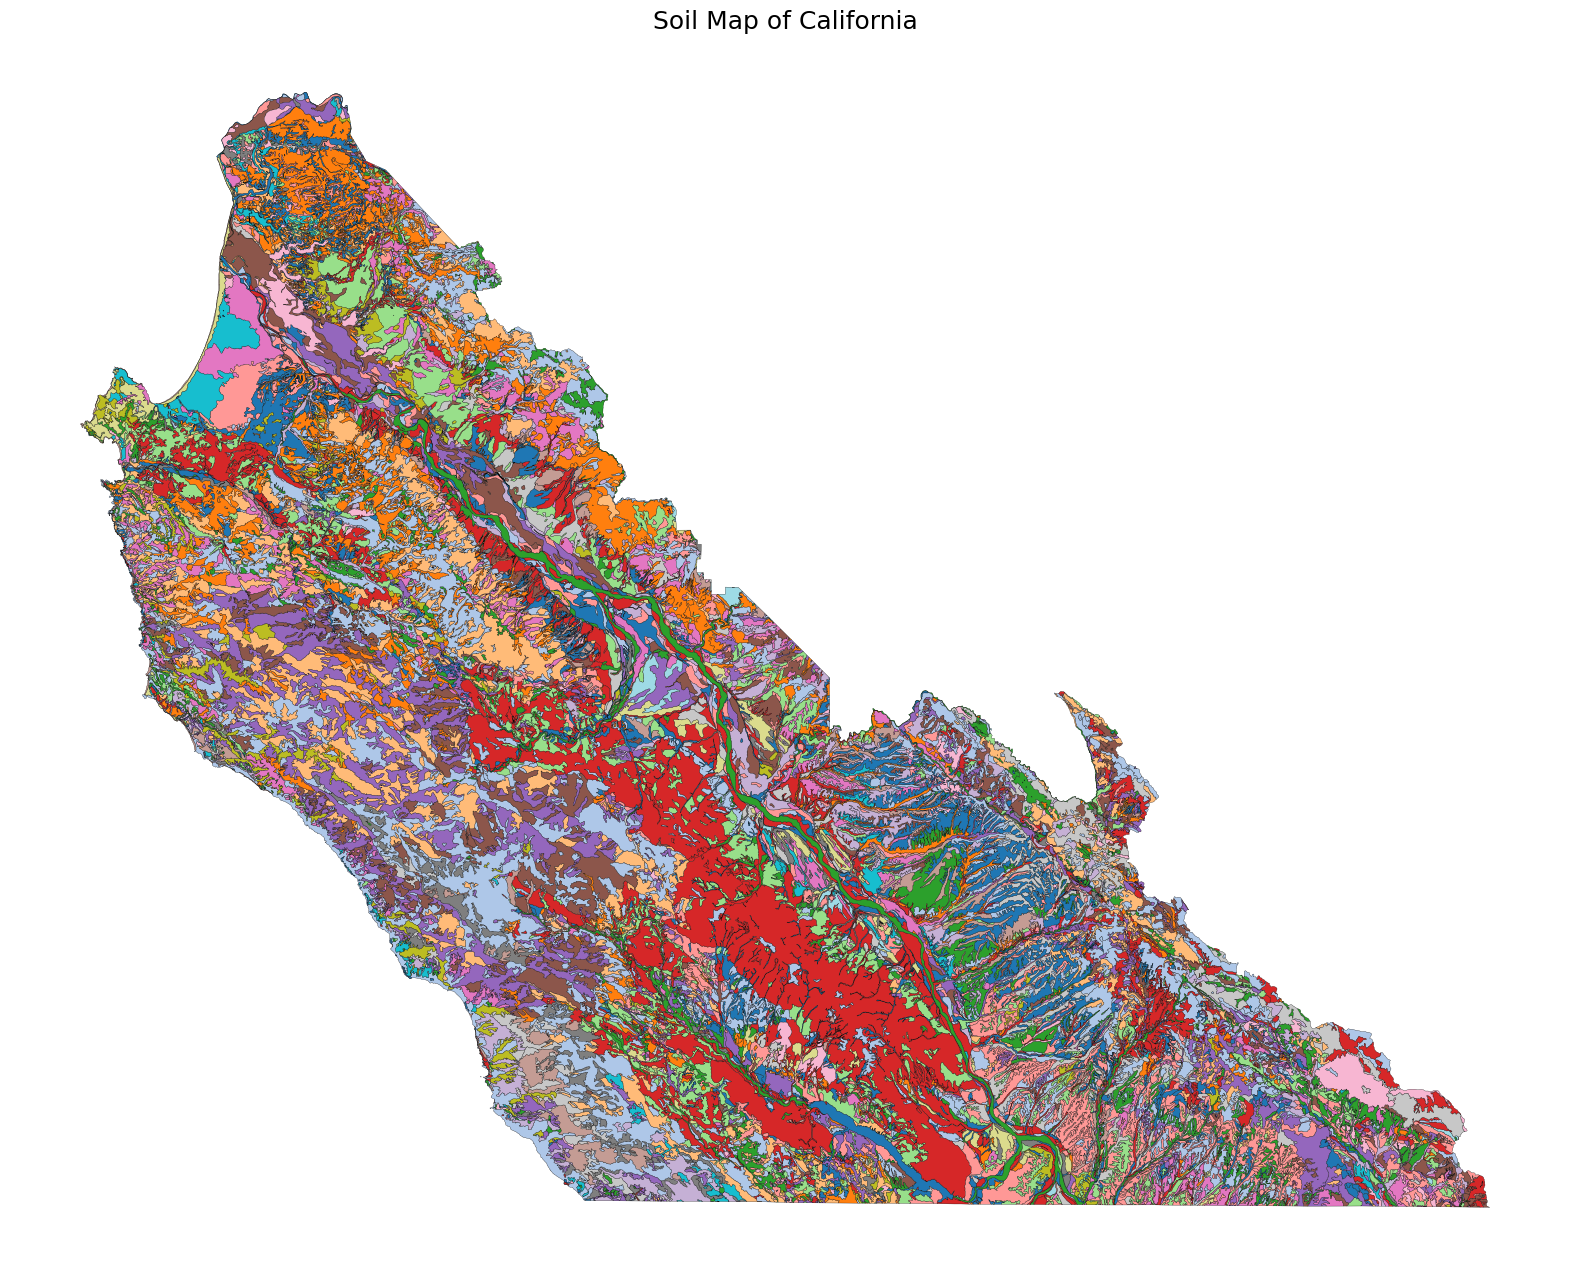

In [23]:
gdf = gpd.read_file('/data2/hkaman/Data/FoundationModel/Monterey/Soil/Monterey/spatial/soilmu_a_ca053.shp')

# Assign unique colors for each soil type
unique_soil_types = gdf["MUSYM"].unique()
print(f"Found {len(unique_soil_types)} unique soil types.")

# Create a colormap with unique colors
colormap = plt.cm.get_cmap("tab20", len(unique_soil_types))  # Use a categorical colormap
color_mapping = {soil_type: colormap(i) for i, soil_type in enumerate(unique_soil_types)}

# Add a color column to GeoDataFrame
gdf["color"] = gdf["MUSYM"].map(color_mapping)

# Plot the entire California map
fig, ax = plt.subplots(figsize=(20, 20))
gdf.plot(ax=ax, color=gdf["color"], edgecolor="black", linewidth=0.2)

# Customize the map
ax.set_title("Soil Map of California", fontsize=18)
ax.axis("off")